Predict Future Sales
==========
Final project for "How to win a data science competition" Coursera course


----------------

#### Data fields
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category

## EDA

In [1]:
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [2]:
df_train = pd.read_csv('../data/sales_train.csv')
df_shops = pd.read_csv('../data/shops.csv')
df_items = pd.read_csv('../data/items.csv')
df_items_categories = pd.read_csv('../data/item_categories.csv')

In [3]:
df_train.describe()

date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03

In [4]:
# 해당 ID merge 작업
df_train = pd.merge(df_train, df_shops)
df_train = pd.merge(df_train, df_items)
df_train = pd.merge(df_train, df_items_categories)

In [5]:
df_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154       999.0           1.0   
1  02.01.2013               0       25    22154       999.0           1.0   
2  03.01.2013               0       25    22154       999.0           1.0   
3  20.01.2013               0       25    22154       999.0           1.0   
4  23.01.2013               0       25    22154       999.0           1.0   

                shop_name          item_name  item_category_id  \
0  Ярославль ТЦ "Альтаир"  ЯВЛЕНИЕ 2012 (BD)                37   
1     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   
2     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   
3     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   
4     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   

  item_category_name  
0     Кино - Blu-Ray  
1     Кино - Blu-Ray  
2     Кино - Blu-Ray  
3     Кино - Blu-Ray  
4     Кино - Blu-Ray

In [6]:
df_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'shop_name', 'item_name', 'item_category_id',
       'item_category_name'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                  object
date_block_num        int64
shop_id               int64
item_id               int64
item_price            float64
item_cnt_day          float64
shop_name             object
item_name             object
item_category_id      int64
item_category_name    object
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [8]:
# 결측치 확인
df_train.isnull().sum()
#sns.heatmap(df_train.isnull(), cbar=False)

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
shop_name             0
item_name             0
item_category_id      0
item_category_name    0
dtype: int64

In [42]:
pp.ProfileReport(df_train)

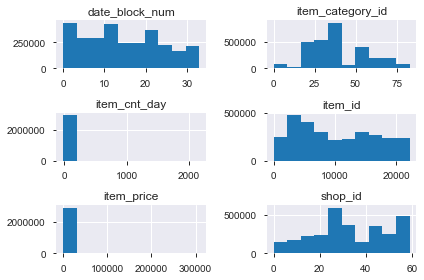

In [9]:
df_train.hist()
plt.tight_layout()
plt.show()

In [10]:
print('Min price =', df_train['item_price'].min())
print('Max price =', df_train['item_price'].max())

Min price = -1.0
Max price = 307980.0


In [11]:
df_train_monthly = df_train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]
df_train_monthly = df_train_monthly.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)
df_train_monthly = df_train_monthly.agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean','count']})

In [12]:
df_train_monthly.head()

date_block_num shop_id item_category_id item_id item_price          \
                                                         sum    mean   
0              0       0                2    5572     7932.0  1322.0   
1              0       0                2    5573      560.0   560.0   
2              0       0                2    5575     2418.0   806.0   
3              0       0                2    5576    11155.0  2231.0   
4              0       0                2    5609     2381.0  2381.0   

  item_cnt_day                  
           sum      mean count  
0         10.0  1.666667     6  
1          1.0  1.000000     1  
2          4.0  1.333333     3  
3          5.0  1.000000     5  
4          1.0  1.000000     1

In [13]:
df_train_monthly.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_price_mean', 'item_cnt_sum', 'item_cnt_mean', 'item_cnt_count']

In [14]:
df_train_monthly.head()

date_block_num  shop_id  item_category_id  item_id  item_price  \
0               0        0                 2     5572      7932.0   
1               0        0                 2     5573       560.0   
2               0        0                 2     5575      2418.0   
3               0        0                 2     5576     11155.0   
4               0        0                 2     5609      2381.0   

   item_price_mean  item_cnt_sum  item_cnt_mean  item_cnt_count  
0           1322.0          10.0       1.666667               6  
1            560.0           1.0       1.000000               1  
2            806.0           4.0       1.333333               3  
3           2231.0           5.0       1.000000               5  
4           2381.0           1.0       1.000000               1

In [58]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_train_monthly.describe()

date_block_num       shop_id  item_category_id       item_id  \
count    1.606541e+06  1.606541e+06      1.606541e+06  1.606541e+06   
mean     1.466426e+01  3.280584e+01      4.154837e+01  1.068188e+04   
std      9.542351e+00  1.653645e+01      1.632090e+01  6.238702e+03   
min      0.000000e+00  0.000000e+00      0.000000e+00  0.000000e+00   
25%      6.000000e+00  2.100000e+01      3.000000e+01  5.046000e+03   
50%      1.400000e+01  3.100000e+01      4.000000e+01  1.049700e+04   
75%      2.300000e+01  4.700000e+01      5.500000e+01  1.606000e+04   
max      3.300000e+01  5.900000e+01      8.300000e+01  2.216900e+04   

         item_price  item_price_mean  item_cnt_sum  item_cnt_mean  \
count  1.606541e+06     1.606541e+06  1.606541e+06   1.606541e+06   
mean   1.624108e+03     7.902391e+02  2.270845e+00   1.073235e+00   
std    5.703802e+03     1.550771e+03  8.656355e+00   1.241622e+00   
min    9.000000e-02     9.000000e-02 -2.200000e+01  -2.200000e+01   
25%    2.490000e+02     1.990000e+02  1.000000e+00   1.000000e+00   
50%    4.990000e+02     3.990000e+02  1.000000e+00   1.000000e+00   
75%    1.398000e+03     8.900000e+02  2.000000e+00   1.000000e+00   
max    6.719300e+05     3.079800e+05  2.253000e+03   1.000000e+03   

       item_cnt_count  
count    1.606541e+06  
mean     1.824204e+00  
std      1.983204e+00  
min      1.000000e+00  
25%      1.000000e+00  
50%      1.000000e+00  
75%      2.000000e+00  
max      3.100000e+01

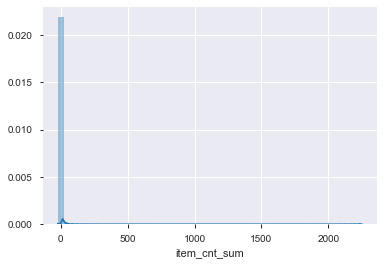

In [59]:
sns.distplot(df_train_monthly['item_cnt_sum'])

In [60]:
df_train_monthly['item_cnt_sum'].sort_values()

576167      -22.0
11136       -13.0
11137        -6.0
1026010      -5.0
94374        -4.0
            ...  
1412903    1242.0
657978     1305.0
1574074    1644.0
1552390    1644.0
1581820    2253.0
Name: item_cnt_sum, Length: 1606541, dtype: float64

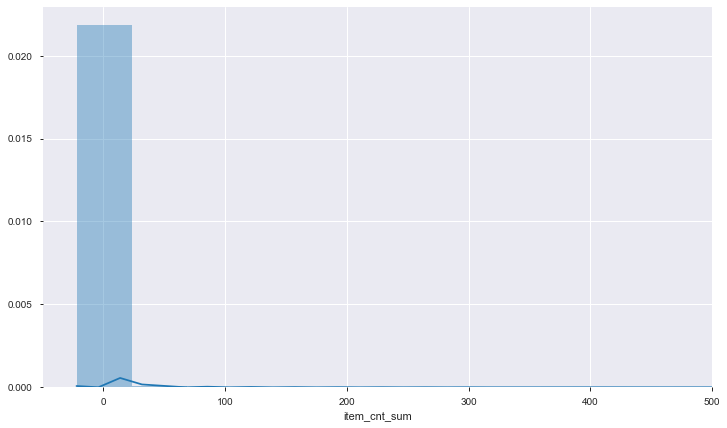

In [61]:
plt.figure(figsize = (12,7))
plt.xlim(-50, 500)
sns.distplot(df_train_monthly['item_cnt_sum'])
plt.show()

In [35]:
#df_train_monthly = df_train_monthly[df_train_monthly.item_cnt_sum != 0]
#df_train_monthly[df_train_monthly['item_cnt_sum'] > 0].max()

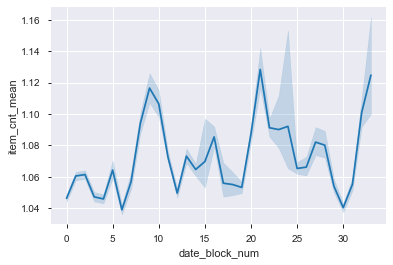

In [16]:
# 월별 평균 아이템 팬매량
sns.lineplot(x="date_block_num", y= "item_cnt_mean", data = df_train_monthly)

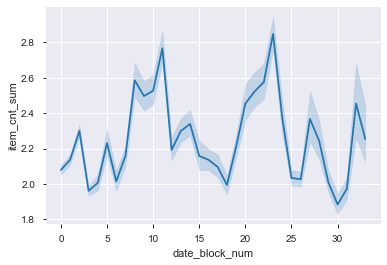

In [17]:
# 월별 총 아이템 판매량
sns.lineplot(x="date_block_num", y= "item_cnt_sum", data = df_train_monthly)

In [63]:
df_train_monthly['month'] = df_train_monthly['date_block_num'].apply(lambda x: (x % 12))

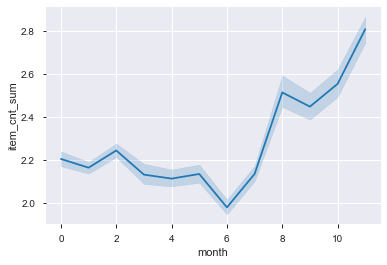

In [64]:
# 월별 총 아이템 판매량
sns.lineplot(x="month", y= "item_cnt_sum", data = df_train_monthly)

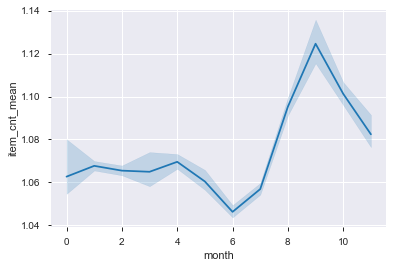

In [65]:
# 월별 총 아이템 판매량
sns.lineplot(x="month", y= "item_cnt_mean", data = df_train_monthly)

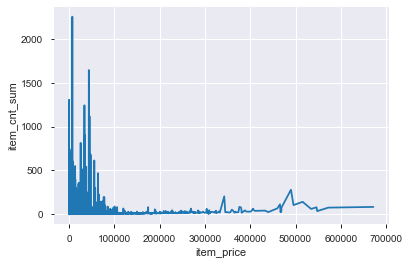

In [67]:
sns.lineplot(x="item_price", y= "item_cnt_sum", data = df_train_monthly)

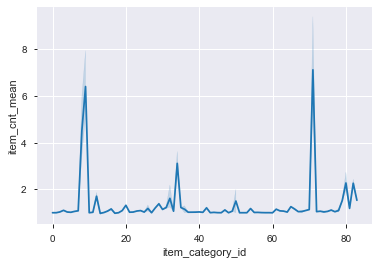

In [68]:
sns.lineplot(x="item_category_id", y= "item_cnt_mean", data = df_train_monthly)

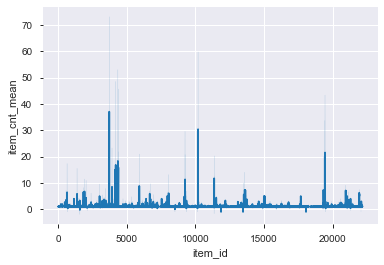

In [69]:
sns.lineplot(x="item_id", y= "item_cnt_mean", data = df_train_monthly)

In [70]:
df_train_monthly['item_category_id'].max()

83

In [71]:
df_train_category = df_train_monthly[df_train_monthly.item_category_id == 15]

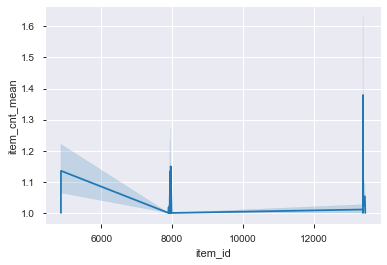

In [72]:
sns.lineplot(x="item_id", y= "item_cnt_mean", data = df_train_category)

### 의견 
- 아이템이 유동적이기 때문에 판매량이 많은 카테고리, 아이템이 입고됬을시 높음
- 아이템으로 나누는것보단 카테고리를 기준으로 예측해도 좋을거 같음
- 4/4 분기에 높음